## ✨ Step 1: Install scikit-learn

In [1]:
!pip install scikit-learn

## ✨ Step 2: Import necessary libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## ✨ Step 3: Load and clean the dataset

In [29]:
file_path = r"C:\Users\Asus\Music\King_County_Housing_Project\notebooks\cleaned_kc_house_data.csv"
df = pd.read_csv(file_path)

In [30]:
# Display the first few rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
# Check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [32]:
# Drop missing values if any
df = df.dropna()

In [33]:
# Drop irrelevant columns (id and date are not useful for regression)
df = df.drop(columns=['id', 'date'])

In [34]:
# Display dataset summary statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## ✨ Step 2: Explore data visually (Scatter Plot)

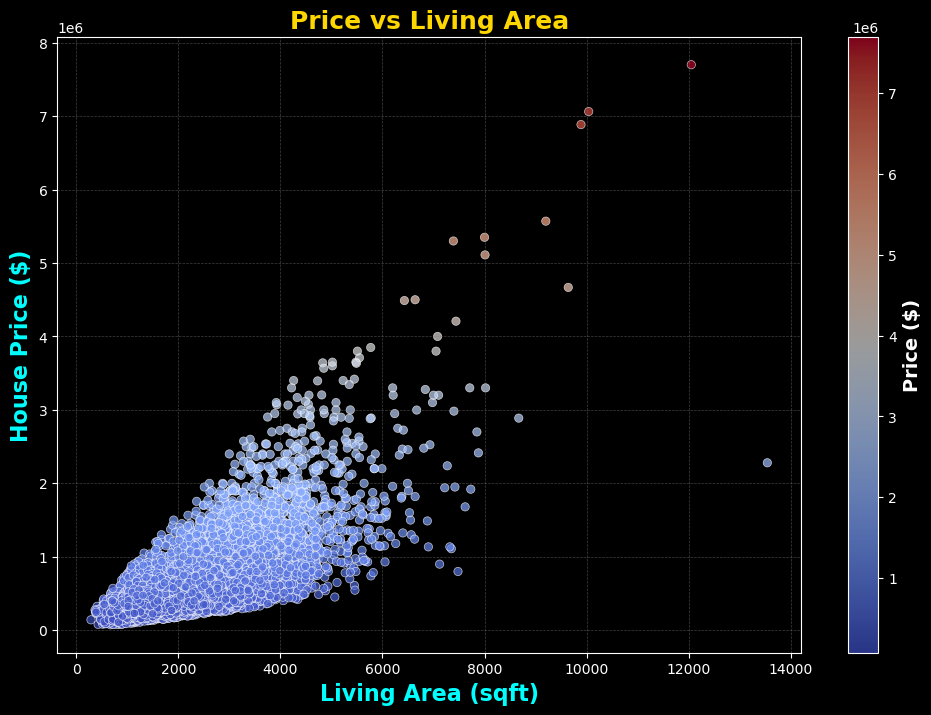

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a dark background theme for a modern, professional look
plt.style.use("dark_background")

# Create figure
plt.figure(figsize=(12, 8))

# Use a visually appealing color map for scatter points
colors = df['price']  # Color points based on price
cmap = "coolwarm"  # Gradient from cool to warm colors

# Create scatterplot with enhanced styling
scatter = plt.scatter(
    df['sqft_living'], 
    df['price'], 
    c=colors, 
    cmap=cmap, 
    alpha=0.7, 
    edgecolor="white", 
    linewidth=0.5
)

# Add color bar to indicate price scale
cbar = plt.colorbar(scatter)
cbar.set_label("Price ($)", fontsize=14, fontweight='bold', color='white')

# Improve labels with bold, readable font
plt.xlabel("Living Area (sqft)", fontsize=16, fontweight='bold', color='cyan')
plt.ylabel("House Price ($)", fontsize=16, fontweight='bold', color='cyan')

# Updated title (removed emojis to fix error)
plt.title("Price vs Living Area", fontsize=18, fontweight='bold', color='gold')

# Add a grid with custom styling
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5, color="gray")

# Show the final polished chart
plt.show()


# 🏡 Step 5: State the Hypothesis  

### **Hypothesis Statement:**  
📌 **Null Hypothesis (H₀):** There is **no relationship** between **sqft_living** and **house price**.  
📌 **Alternative Hypothesis (H₁):** There is a **positive relationship** between **sqft_living** and **house price**.  


## ✨ Step 6: Reshape Data into NumPy Arrays

In [37]:
X = df[['sqft_living']].values  # Independent variable
y = df['price'].values          # Dependent variable

## ✨ Step 7: Split the Data (Train & Test Sets)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ✨ Step 8: Train the Linear Regression Model

In [39]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values for the test set
y_pred = model.predict(X_test)

## ✨ Step 9: Visualizing the Regression Line

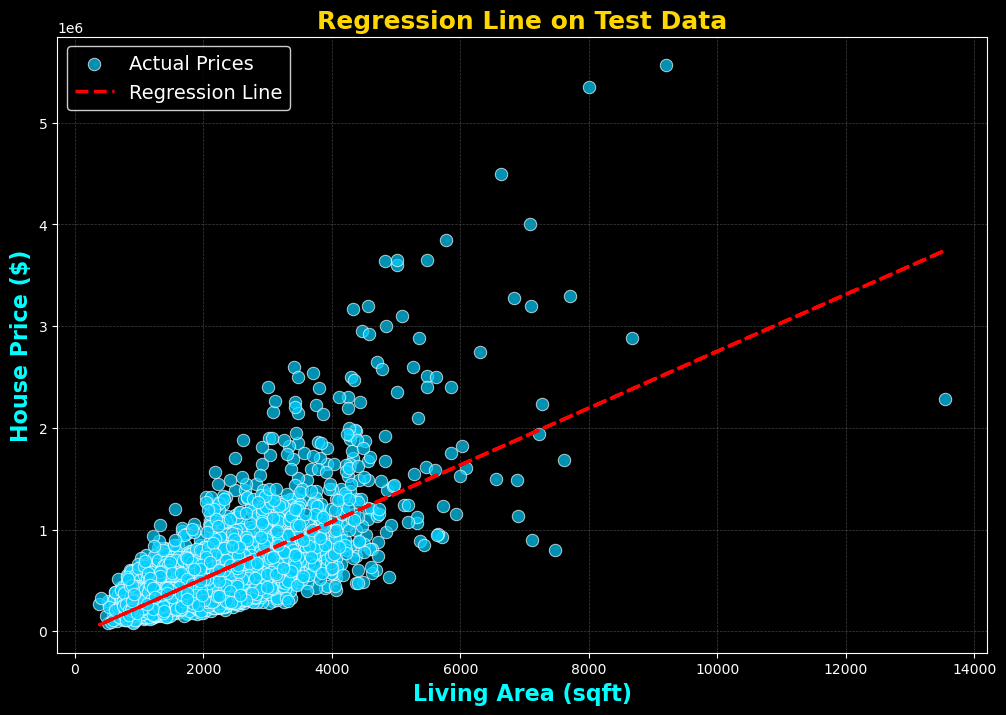

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a modern dark theme for a sleek look
plt.style.use("dark_background")

# Create a figure with optimized size
plt.figure(figsize=(12, 8))

# Scatter plot with visually appealing aesthetics
sns.scatterplot(
    x=X_test.flatten(), 
    y=y_test, 
    alpha=0.7, 
    color="#00CFFF",  # Bright blue for contrast
    edgecolor="white", 
    s=80,  # Larger dots for better visibility
    label="Actual Prices"
)

# Regression Line (line of best fit)
plt.plot(
    X_test, 
    y_pred, 
    color='red', 
    linewidth=2.5,  # Make the line bold and distinct
    linestyle="--", 
    label="Regression Line"
)

# Improve labels with bold and high-contrast font
plt.xlabel("Living Area (sqft)", fontsize=16, fontweight='bold', color='cyan')
plt.ylabel("House Price ($)", fontsize=16, fontweight='bold', color='cyan')

# Updated title (removed emoji to fix error)
plt.title("Regression Line on Test Data", fontsize=18, fontweight='bold', color='gold')

# Enhanced legend placement and styling
plt.legend(fontsize=14, loc="upper left", frameon=True, edgecolor="white")

# Add a subtle grid with a modern touch
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5, color="gray")

# Display the final polished chart
plt.show()

## ✨ Step 10: Model Performance Evaluation

In [24]:
# Calculate Mean Squared Error (MSE) and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 76484977061.78
R² Score: 0.4941


## ✨ Step 11: Compare Predicted vs Actual Values

In [26]:
# Create a DataFrame to compare actual vs predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Display first 10 rows
comparison_df.head(10)

,Actual Price,Predicted Price
0,365000.0,5.366792e+05
1,865000.0,7.687097e+05
2,1038000.0,1.011922e+06
3,1490000.0,1.232771e+06
4,711000.0,6.708655e+05
5,211000.0,4.360395e+05
6,790000.0,7.100032e+05
7,680000.0,4.611994e+05
8,384500.0,4.052885e+05
9,605000.0,2.123957e+05


## ✨ Step 12:  Interpretation and Reflection

  ### **📊 Understanding the R² Score:**
- **R² (Coefficient of Determination)** tells us **how well the model explains the variance** in house prices.  
- **Interpretation:**
  - **📈 R² = 1** → The model perfectly predicts house prices.
  - **⚖️ 0 < R² < 1** → The model captures some variance but is not perfect.
  - **❌ R² ≈ 0** → The model has little to no predictive power.

### **📉 Understanding the Mean Squared Error (MSE):**
- **MSE (Mean Squared Error)** measures the **average squared difference** between actual and predicted prices.  
- **Interpretation:**
  - **✅ Low MSE** → Predictions are close to actual prices (good model performance).  
  - **❌ High MSE** → Predictions have large errors, indicating poor model performance.  

### **🎯 Conclusion:**
- A **high R² and low MSE** indicate a well-performing model.  
- A **low R² and high MSE** suggest that the model needs improvements, such as adding more features or using a different approach.
